In [95]:
import pandas as pd
import numpy as np
import datetime
from ahh import era, ext, vis, sci
import matplotlib.dates as mdates
%matplotlib inline

In [151]:
df = pd.read_csv('LOGGER16.CSV')
df = df[pd.notnull(df)['date']]
datetime_str = [date + ' ' + time for (date, time) in zip(df['date'], df['time'])]
dts = era.time2dt(datetime_str, strf='infer')
local_dts = pd.DatetimeIndex([(dt - datetime.timedelta(hours=6)) for dt in dts])
df = df.assign(dts=dts, local_dt=local_dts)
df['days'] = round(df['seconds'] / 3600 / 24)
df['bmpTemp[F]'] = sci.convert(df['bmpTemp[C]'], c2f=True)
df['HIHTemp[F]'] = sci.convert(df['HIHtemp[C]'], c2f=True)

mdf = pd.read_csv('CMI.csv', skiprows=range(0, 5))
mdf.columns = [x.strip(' ') for x in mdf.columns]
mdf = mdf.loc[(mdf['tmpf'] != 'M') & (mdf['mslp'] != 'M')]
mdts = era.time2dt(mdf['valid'], strf='infer')
mlocal_dts = pd.DatetimeIndex([(mdt - datetime.timedelta(hours=6)) for mdt in mdts])
mdf = mdf.assign(mlocal_dts=mlocal_dts)
mdf = mdf.loc[(mdf['mlocal_dts'] >= datetime.datetime(2017, 2, 5))]
mtmpf = np.array(mdf['tmpf'], dtype='float')
mpres = mdf['mslp'].astype(float)
mrelh = mdf['relh'].astype(float)
mdf.loc[mdf['skyc1'] == 'CLR', 'skyc2'] = 0
mdf.loc[mdf['skyc2'] == 'M', 'skyc2'] = 0
mdf.loc[mdf['drct'] == 'M', 'drct'] = 180
mdf.loc[mdf['sknt'] == 'M', 'sknt'] = 10
mdf.loc[mdf['skyc1'] == 'VV', 'skyc2'] = 0
mdf.loc[mdf['skyc1'] == 'FEW', 'skyc2'] = 25
mdf.loc[mdf['skyc1'] == 'SCT', 'skyc2'] = 50
mdf.loc[mdf['skyc1'] == 'BKN', 'skyc2'] = 75
mdf.loc[mdf['skyc1'] == 'OVC', 'skyc2'] = 100
msky = mdf['skyc2'].astype(float)
# mpcp = mdf['p01i'].astype(float)
mspd = mdf['sknt'].astype(float)
mdir = mdf['drct'].astype(float)

corrected_pres_approx = df['Pressure[Pa]'] / 100 + (230 / 9.2)

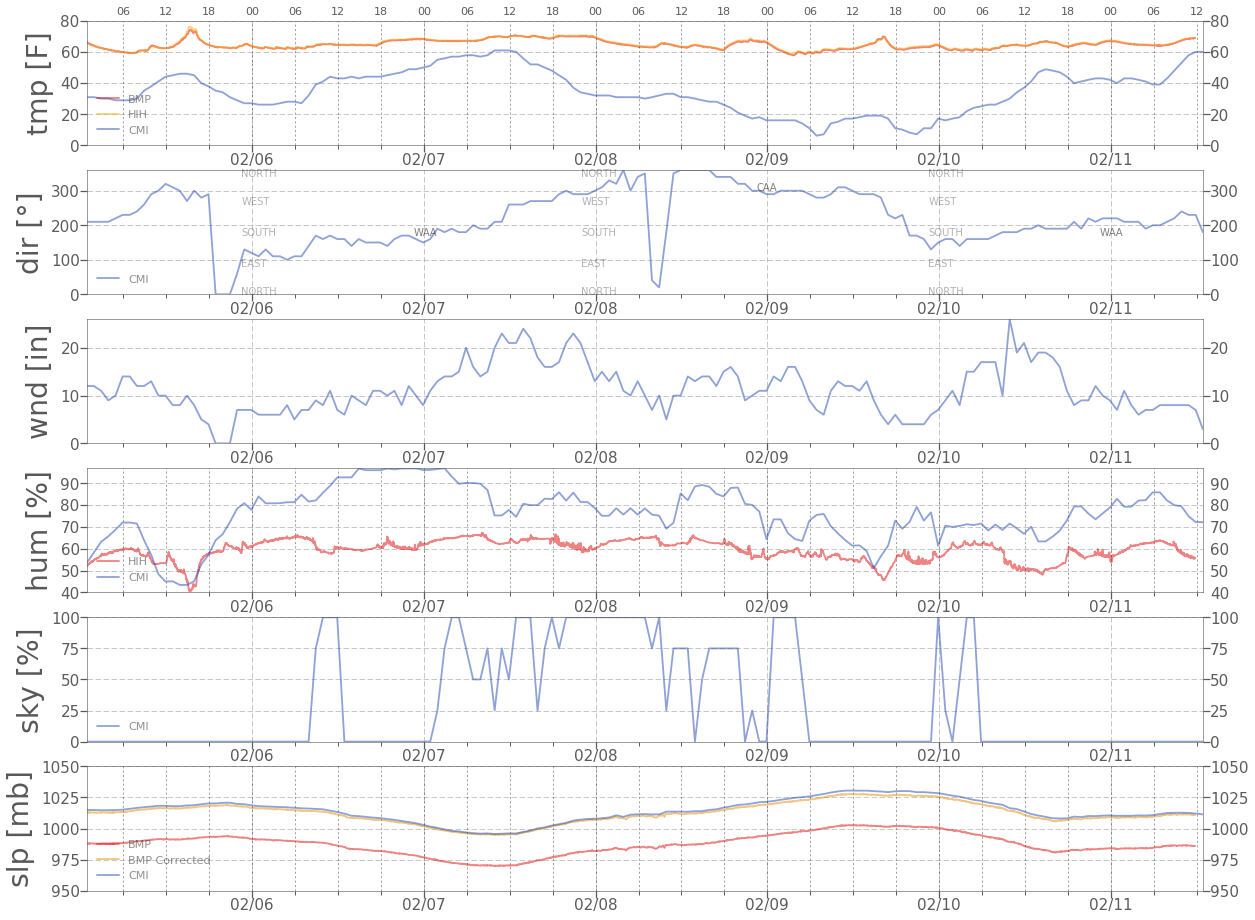

In [157]:
bmpPres = df['Pressure[Pa]'] / 100

ax = vis.plot_line(local_dts, df['bmpTemp[F]'], figsize=(20, 16), label='BMP', rows=6, pos=1)
ax2 = vis.plot_line(local_dts, df['HIHTemp[F]'], color='orange', label='HIH', rows=6, pos=1)
ax3 = vis.plot_line(mdf['mlocal_dts'], mtmpf, rows=6, pos=1, color=vis.COLORS['blue'], ylim=(0, 80), label='CMI', ylabel='tmp [F]')

ax7 = vis.plot_line(local_dts, df['RH[%]'], label='HIH', rows=6, pos=4)
ax8 = vis.plot_line(mdf['mlocal_dts'], mrelh, label='CMI', rows=6, pos=4, color=vis.COLORS['blue'], ylabel='hum [%]')

ax4 = vis.plot_line(local_dts, bmpPres, rows=6, pos=6, label='BMP')
ax5 = vis.plot_line(local_dts, corrected_pres_approx, rows=6, pos=6, label='BMP Corrected', color=vis.COLORS['orange'])
ax6= vis.plot_line(mdf['mlocal_dts'], mpres, rows=6, pos=6, color=vis.COLORS['blue'], ylim=(950, 1050), label='CMI', ylabel='slp [mb]')

ax9 = vis.plot_line(mdf['mlocal_dts'], msky, label='CMI', rows=6, pos=5, color=vis.COLORS['blue'], ylabel='sky [%]')

ax10 = vis.plot_line(mdf['mlocal_dts'], mdir, label='CMI', rows=6, pos=2, color=vis.COLORS['blue'], ylabel='dir [°]')
mid_date = datetime.datetime(2017, 2, 7, 22)
ax10.annotate('NORTH', (mdates.date2num(mid_date), 0), alpha=0.3)
ax10.annotate('EAST', (mdates.date2num(mid_date), 90 - 10), alpha=0.3)
ax10.annotate('SOUTH', (mdates.date2num(mid_date), 180 - 10), alpha=0.3)
ax10.annotate('WEST', (mdates.date2num(mid_date), 270 - 10), alpha=0.3)
ax10.annotate('NORTH', (mdates.date2num(mid_date), 360 - 20), alpha=0.3)

left_date = datetime.datetime(2017, 2, 5, 22, 30)
ax10.annotate('NORTH', (mdates.date2num(left_date), 0), alpha=0.3)
ax10.annotate('EAST', (mdates.date2num(left_date), 90 - 10), alpha=0.3)
ax10.annotate('SOUTH', (mdates.date2num(left_date), 180 - 10), alpha=0.3)
ax10.annotate('WEST', (mdates.date2num(left_date), 270 - 10), alpha=0.3)
ax10.annotate('NORTH', (mdates.date2num(left_date), 360 - 20), alpha=0.3)

right_date = datetime.datetime(2017, 2, 9, 22, 30)
ax10.annotate('NORTH', (mdates.date2num(right_date), 0), alpha=0.3)
ax10.annotate('EAST', (mdates.date2num(right_date), 90 - 10), alpha=0.3)
ax10.annotate('SOUTH', (mdates.date2num(right_date), 180 - 10), alpha=0.3)
ax10.annotate('WEST', (mdates.date2num(right_date), 270 - 10), alpha=0.3)
ax10.annotate('NORTH', (mdates.date2num(right_date), 360 - 20), alpha=0.3)

waa_date = datetime.datetime(2017, 2, 6, 22, 30)
ax10.annotate('WAA', (mdates.date2num(waa_date), 180 - 10), alpha=0.5)

waa_date2 = datetime.datetime(2017, 2, 10, 22, 30)
ax10.annotate('WAA', (mdates.date2num(waa_date2), 180 - 10), alpha=0.5)

caa_date = datetime.datetime(2017, 2, 8, 22, 30)
ax10.annotate('CAA', (mdates.date2num(caa_date), 300), alpha=0.5)

ax11 = vis.plot_line(mdf['mlocal_dts'], mspd, label='CMI', rows=6, pos=3, color=vis.COLORS['blue'], ylabel='wnd [in]')

vis.set_major_ticks(ax, xlocator='days', xinterval=1, xformatter='%m/%d', right=True)
vis.set_major_ticks(ax5, xlocator='days', xinterval=1, xformatter='%m/%d', right=True)
vis.set_major_ticks(ax7, xlocator='days', xinterval=1, xformatter='%m/%d', right=True)
vis.set_major_ticks(ax9, xlocator='days', xinterval=1, xformatter='%m/%d', right=True)
vis.set_major_ticks(ax10, xlocator='days', xinterval=1, xformatter='%m/%d', right=True)
vis.set_major_ticks(ax11, xlocator='days', xinterval=1, xformatter='%m/%d', right=True)

vis.set_major_tick_labels(ax, right=True)
vis.set_major_tick_labels(ax5, right=True)
vis.set_major_tick_labels(ax7, right=True)
vis.set_major_tick_labels(ax9, right=True)
vis.set_major_tick_labels(ax10, right=True)
vis.set_major_tick_labels(ax11, right=True)

vis.set_minor_ticks(ax, xlocator='hours', xinterval=6, xformatter='%H')
vis.set_minor_ticks(ax5, xlocator='hours', xinterval=6, xformatter='%H')
vis.set_minor_ticks(ax7, xlocator='hours', xinterval=6, xformatter='%H')
vis.set_minor_ticks(ax9, xlocator='hours', xinterval=6, xformatter='%H')
vis.set_minor_ticks(ax10, xlocator='hours', xinterval=6, xformatter='%H')
vis.set_minor_ticks(ax11, xlocator='hours', xinterval=6, xformatter='%H')
vis.set_minor_tick_labels(ax9, bottom=False)
vis.set_minor_tick_labels(ax10, bottom=False)
vis.set_minor_tick_labels(ax11, bottom=False)

vis.set_major_ticks(ax7, yticks=[40, 50, 60, 70, 80, 90])

loc = 'lower left'
vis.set_minor_tick_labels(ax, top=True)
vis.set_legend(ax, scale=1, loc=loc)
vis.set_legend(ax5, scale=1, loc=loc)
vis.set_legend(ax7, scale=1, loc=loc)
vis.set_legend(ax9, scale=1, loc=loc)
vis.set_legend(ax10, scale=1, loc=loc)